# MACHINE LEARNING FOR FINANCIAL SERVICES

Welcome to IBM's Data Science Experience! This exciting tool will help your life a lot easier as a data scientist. Below is a simple introductory example of how easy for you to load your data and run some unsupervised machine learing algorithms.

## Customer Custering: Unsupervised Machine Learning
In this notebook, I chose a hypothetical insurance data to cluster the customers into different segments, and you will how find how easy it is for a data scientist to run unsuperivsed machine learning techniques 

Unlike the supervised learning where it has a goal of "classify" the data by training the models to predict for the pre-labeled response vector (a famous example would be ham/spam classification), unsupervised learning has a goal to "cluster" data that are usually not pre-labeled for response vector, hence finding a centroid (or a center) of the cluster is an important part of this unsupervised learning.  K-means and DBSCAN are two common/basic types of unsupervised machine learning techniques, and this notebook show-cases how to cluster a sample insurance data based on a few selected feature vectors.

## Agenda:

1. K-means clustering
2. Clustering evaluation
3. DBSCAN clustering

### To load the data:

1. Load your local file into your notebook. Click the **Find and Add Data** icon on the notebook action bar. Drop the file into the box or browse to select the file. The file is loaded to your object storage and appears in the Data Assets section of the project. For more information, see <a href="https://datascience.ibm.com/docs/content/analyze-data/load-and-access-data.html" target="_blank" rel="noopener noreferrer">Load and access data</a>.
1. click in the next code cell and select **Insert to code > pandas DataFrame** under the file name.

For this exercise, the above steps were done in advance, and a csv file has been put in this notebook's working directory

In [11]:
#%ls -l

In [12]:
# read a dataset of interest

import pandas as pd

# reset the option to show all the columns
pd.set_option('display.max_columns', None)

df = pd.read_csv('merge_ab_chyl1.csv')

df.head(10)

,INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,EDUCATION_LEVEL,EMPLOYMENT_STATUS,GENDER,MARITAL_STATUS,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,RENEWAL_DATE,PAYMENT_FREQUENCY,CHURN,CURRENT_ROW_INDICATOR,REGION,COUNTRY,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,COUNTRY_NAME,BUNDLE_INDICATOR,REGION_NAME,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,PAYMENT_TYPE,CUSTOMER_TYPE,CANCELLATION_REASON,NUMBER_OF_RISKS,AUTO_MAKE,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP,AUTO_MODEL,AGENT,CHANNEL
0,10001831,1002373,2,76152,27,6,287,0,Professional,Selfemployed,M,Married,150,500,525,4/2/18,MONTHLY,1,1,OHIO,US,525,170,US,0,CENTRAL,430,3,2,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Robinson,Bank
1,10001833,1002375,0,78256,25,2,391,4,PhD,Unemployed,F,Single,211,600,700,4/4/18,QUARTERLY,1,1,OHIO,US,800,188,US,0,CENTRAL,430,2,1,CASH,SHORT-TERM,DECEASED,2,BMW,2016,1,4SERIES,Mitchell,Agent
2,10001840,1002382,6,129728,41,2,337,14,Graduate,Employed,M,Married,111,600,600,4/11/18,QUARTERLY,1,1,OHIO,US,900,200,US,0,CENTRAL,430,2,32,CASH,SHORT-TERM,NSF,3,BMW,2016,1,4SERIES,Moore,Bank
3,10001843,1002385,1,75122,30,0,206,10,PhD,Employed,F,Married,23,600,720,4/14/18,QUARTERLY,1,1,OHIO,US,480,77,US,0,CENTRAL,430,2,3,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Rodriguez,Bank
4,10001855,1002397,1,61575,26,2,244,16,PhD,Employed,U,Married,166,500,1000,4/18/18,YEARLY,1,1,OHIO,US,600,50,US,0,CENTRAL,430,5,24,CASH,SHORT-TERM,DECEASED,4,TOYOTA,2014,3,CAMRY,Turner,Agent
5,10001858,1002400,0,77121,30,8,545,2,High School,Employed,M,Married,98,225,600,4/3/18,YEARLY,1,1,OHIO,US,522,45,US,0,CENTRAL,430,3,9,CASH,NEW,NSF,3,GMC,2012,5,ACADIA,Parker,Bank
6,10001863,1002405,0,70653,48,4,439,3,Graduate,Unemployed,F,Divorce,42,225,500,4/8/18,YEARLY,1,1,OHIO,US,700,431,US,1,CENTRAL,430,3,0,CASH,SHORT-TERM,DECEASED,4,HONDA,2016,1,CIVIC,Cook,Bank
7,10001867,1002409,0,116898,24,2,290,3,Graduate,Unemployed,F,Married,15,600,525,4/12/18,YEARLY,1,1,OHIO,US,800,50,US,0,CENTRAL,430,2,2,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Jones,Bank
8,10001873,1002415,1,500,54,2,189,3,PhD,Selfemployed,M,Married,210,600,1000,3/11/17,YEARLY,1,1,OHIO,US,770,500,US,0,CENTRAL,430,1,2,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Howard,Bank
9,10001874,1002416,5,591,66,6,142,4,PhD,Retired,M,Divorce,200,890,900,4/19/18,MONTHLY,1,1,OHIO,US,900,94,US,0,CENTRAL,430,4,0,DEBIT,NEW,NSF,3,BMW,2012,5,4SERIES,Gray,Bank


In [13]:
# selecting a few numerical feature attributes for this demo (feature variables should be numeric)

feature_cols = [
    'NUMBER_OF_COMMUNICATIONS',                                                        
    'CLAIMS_COUNT',                                                         
    'SENTIMENT_SCORE',                                                                
    'COMPETITIVE_PRICE',                
    'NUMBER_OF_COMPLAINTS',
]

X = df[feature_cols]
X.head(10)

,NUMBER_OF_COMMUNICATIONS,CLAIMS_COUNT,SENTIMENT_SCORE,COMPETITIVE_PRICE,NUMBER_OF_COMPLAINTS
0,2,6,150,170,2
1,0,2,211,188,1
2,6,2,111,200,32
3,1,0,23,77,3
4,1,2,166,50,24
5,0,8,98,45,9
6,0,4,42,431,0
7,0,2,15,50,2
8,1,2,210,500,2
9,5,6,200,94,0


## Part 1: K-means clustering

> from [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

In [14]:
# K-means with 2 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [15]:
# review the cluster labels
km.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1,

In [16]:
# save the cluster labels and sort by cluster
df['cluster'] = km.labels_
df.sort_values( by = 'cluster')

,INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,EDUCATION_LEVEL,EMPLOYMENT_STATUS,GENDER,MARITAL_STATUS,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,RENEWAL_DATE,PAYMENT_FREQUENCY,CHURN,CURRENT_ROW_INDICATOR,REGION,COUNTRY,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,COUNTRY_NAME,BUNDLE_INDICATOR,REGION_NAME,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,PAYMENT_TYPE,CUSTOMER_TYPE,CANCELLATION_REASON,NUMBER_OF_RISKS,AUTO_MAKE,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP,AUTO_MODEL,AGENT,CHANNEL,cluster
0,10001831,1002373,2,76152,27,6,287,0,Professional,Selfemployed,M,Married,150,500,525,4/2/18,MONTHLY,1,1,OHIO,US,525,170,US,0,CENTRAL,430,3,2,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Robinson,Bank,0
331,10001830,1002372,1,65370,24,0,277,1,Graduate,Employed,M,Divorce,87,625,865,4/1/18,YEARLY,0,1,OHIO,US,725,90,US,0,CENTRAL,430,4,4,DEBIT,LONG-TERM,NSF,2,GMC,2012,5,ACADIA,Phillips,Bank,0
330,10002160,1002702,2,92099,51,2,545,3,PhD,Unemployed,F,Married,50,750,1000,4/19/18,QUARTERLY,0,1,OHIO,US,700,110,US,0,CENTRAL,430,5,0,DEBIT,NEW,NSF,2,FORD,2011,6,F150,Rogers,Bank,0
329,10002159,1002701,2,71501,48,1,543,4,Graduate,Retired,M,Married,60,550,900,3/11/17,YEARLY,0,1,OHIO,US,500,100,US,0,CENTRAL,430,1,3,CASH,SHORT-TERM,DECEASED,3,BMW,2015,2,4SERIES,Watson,Agent,0
328,10002158,1002700,0,580,41,1,158,3,High School,Retired,M,Married,62,600,1200,3/10/17,YEARLY,0,1,OHIO,US,655,180,US,0,CENTRAL,430,2,5,CREDIT,SHORT-TERM,DECEASED,4,TOYOTA,2016,1,CAMRY,Brown,Agent,0
324,10002153,1002695,1,556,31,2,119,2,High School,Retired,F,Single,55,250,710,4/12/18,YEARLY,0,1,OHIO,US,770,180,US,0,CENTRAL,430,3,2,CASH,NEW,NSF,3,GMC,2011,6,ACADIA,Adams,Bank,0
323,10002152,1002694,2,51933,23,0,280,2,Graduate,Employed,M,Married,61,225,600,4/11/18,MONTHLY,0,1,OHIO,US,600,160,US,0,CENTRAL,430,2,1,CASH,NEW,NSF,2,GMC,2011,6,ACADIA,Nelson,Bank,0
321,10002150,1002692,3,127932,22,1,153,4,Graduate,Retired,F,Divorce,50,900,550,4/9/18,QUARTERLY,0,1,OHIO,US,925,200,US,1,CENTRAL,430,2,0,DEBIT,LONG-TERM,EVENT,3,FORD,2009,8,F150,Campbell,Bank,0
320,10002149,1002691,5,64833,60,2,498,1,Graduate,Retired,U,Married,95,500,720,4/8/18,QUARTERLY,0,1,OHIO,US,800,150,US,0,CENTRAL,430,2,3,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,King,Bank,0
319,10002148,1002690,1,129728,31,0,428,2,High School,Selfemployed,M,Divorce,85,625,750,4/7/18,QUARTERLY,0,1,OHIO,US,750,200,US,0,CENTRAL,430,2,4,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Parker,Bank,0


In [17]:
# review the cluster centers
km.cluster_centers_

array([[   1.85326087,    1.48369565,   75.36413043,  146.26086957,
           2.17119565],
       [   1.58433735,    1.19277108,   68.68674699,  295.29518072,
           1.43373494]])

In [18]:
# calculate the mean of each feature for each cluster
df.groupby('cluster').mean()

,INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,CHURN,CURRENT_ROW_INDICATOR,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,BUNDLE_INDICATOR,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,NUMBER_OF_RISKS,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP
cluster,,,,,,,,,,,,,,,,,,,,,,
0,10001979.983696,1002521.983696,1.853261,68818.250000,34.038043,1.483696,350.918478,2.766304,75.364130,560.516304,799.782609,0.135870,1,678.402174,146.260870,0.152174,430,2.502717,2.171196,1.809783,2011.540761,5.459239
1,10001980.975904,1002522.975904,1.584337,66590.090361,33.391566,1.192771,317.192771,2.608434,68.686747,559.939759,708.524096,0.048193,1,670.620482,295.295181,0.186747,430,2.325301,1.433735,2.048780,2011.969880,4.908537


In [19]:
pd.crosstab(df.CHURN, df.cluster)

cluster,0,1
CHURN,,
0,318,158
1,50,8


#### Cluster 0 captures 86% (50/58) of churned accounts, while cluster 1 captures 14% of churned accounts.  In addition, there are many correlated features as you can see the mean statistics

In [20]:
# save the DataFrame of cluster centers
centers = df.groupby('cluster').mean()

In [21]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [22]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red', 'green'])

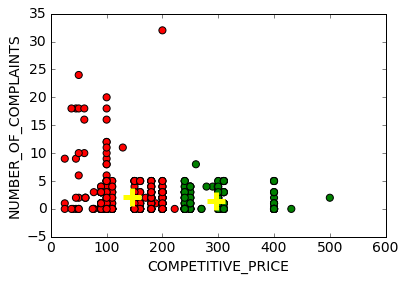

In [23]:
# scatter plot of competitive price versus # of complaints, colored by cluster (0=red, 1=green)
plt.scatter(df.COMPETITIVE_PRICE, df.NUMBER_OF_COMPLAINTS, c=colors[df.cluster], s = 50)

# cluster centers, marked by "+"
plt.scatter(centers.COMPETITIVE_PRICE, centers.NUMBER_OF_COMPLAINTS, linewidths=5, marker='+', s=300, c='yellow')

# add labels
plt.xlabel('COMPETITIVE_PRICE')
plt.ylabel('NUMBER_OF_COMPLAINTS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef124c4990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7feebd551550>]], dtype=object)

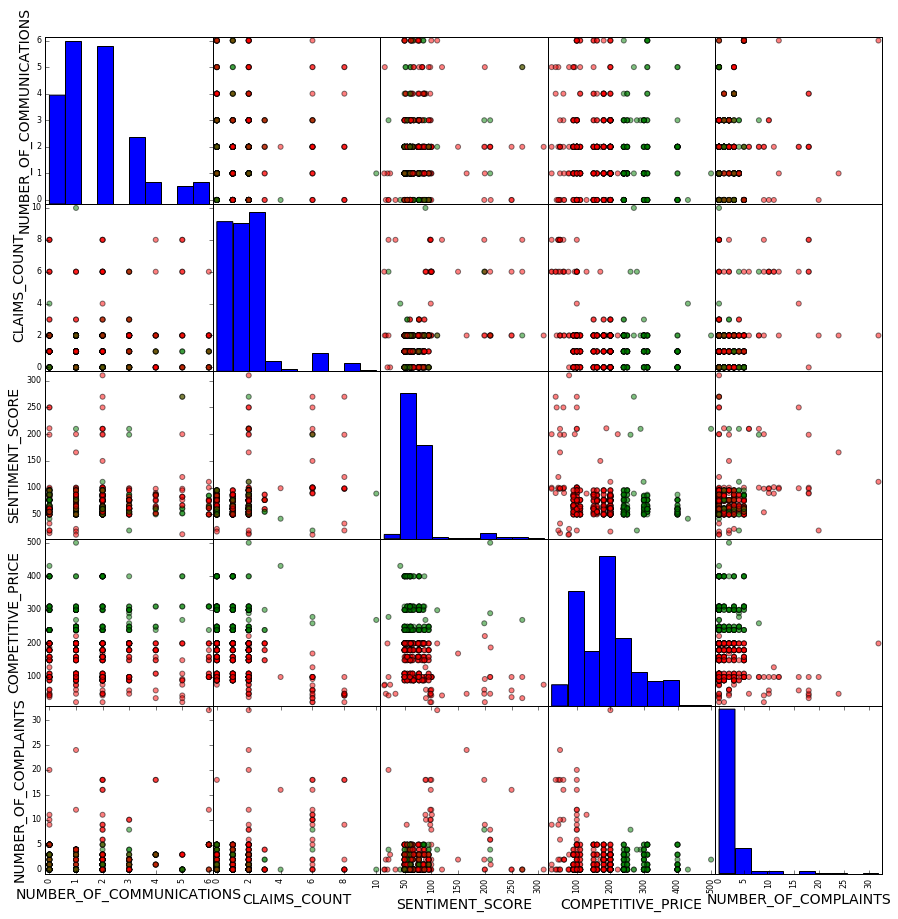

In [24]:
# scatter plot matrix (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[df.cluster], figsize=(15,15), s=100)

### Repeat with scaled data

In [25]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# K-means with 2 clusters on scaled data
km = KMeans(n_clusters=2, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [27]:
# save the cluster labels and sort by cluster
df['cluster'] = km.labels_
df.sort_values(by = 'cluster')

,INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,EDUCATION_LEVEL,EMPLOYMENT_STATUS,GENDER,MARITAL_STATUS,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,RENEWAL_DATE,PAYMENT_FREQUENCY,CHURN,CURRENT_ROW_INDICATOR,REGION,COUNTRY,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,COUNTRY_NAME,BUNDLE_INDICATOR,REGION_NAME,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,PAYMENT_TYPE,CUSTOMER_TYPE,CANCELLATION_REASON,NUMBER_OF_RISKS,AUTO_MAKE,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP,AUTO_MODEL,AGENT,CHANNEL,cluster
0,10001831,1002373,2,76152,27,6,287,0,Professional,Selfemployed,M,Married,150,500,525,4/2/18,MONTHLY,1,1,OHIO,US,525,170,US,0,CENTRAL,430,3,2,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Robinson,Bank,0
28,10001974,1002516,5,75669,48,6,543,11,High School,Retired,M,Married,270,225,1200,4/15/18,YEARLY,1,1,OHIO,US,750,37,US,0,CENTRAL,430,2,0,DEBIT,SHORT-TERM,NSF,3,GMC,2015,2,ACADIA,Baker,Bank,0
29,10001976,1002518,4,500,21,8,207,0,Graduate,Employed,M,Married,98,600,1000,3/10/17,QUARTERLY,1,1,OHIO,US,925,60,US,0,CENTRAL,430,2,18,CREDIT,SHORT-TERM,DECEASED,4,TOYOTA,2016,1,CAMRY,Brown,Agent,0
31,10002000,1002542,3,519,31,6,395,7,High School,Retired,U,Single,99,600,600,4/15/18,QUARTERLY,1,1,OHIO,US,480,60,US,1,CENTRAL,430,2,10,CASH,NEW,NSF,2,GMC,2009,8,ACADIA,Lewis,Bank,0
32,10002003,1002545,1,71501,26,10,244,7,Graduate,Retired,M,Single,89,225,525,3/11/17,YEARLY,1,1,OHIO,US,700,270,US,0,CENTRAL,430,2,0,CASH,SHORT-TERM,DECEASED,4,BMW,2016,1,4SERIES,Mitchell,Agent,0
33,10002009,1002551,2,54534,28,2,238,0,High School,Retired,F,Married,210,650,1000,4/16/18,YEARLY,1,1,OHIO,US,800,50,US,0,CENTRAL,430,2,6,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Baker,Bank,0
34,10002010,1002552,2,77121,41,6,577,16,Graduate,Unemployed,U,Married,250,750,900,4/17/18,QUARTERLY,1,1,OHIO,US,925,60,US,0,CENTRAL,430,4,16,CASH,SHORT-TERM,DECEASED,4,TOYOTA,2014,3,CAMRY,Turner,Agent,0
36,10002023,1002565,1,73965,23,6,573,2,High School,Selfemployed,M,Divorce,100,250,700,4/12/18,MONTHLY,1,1,OHIO,US,550,62,US,0,CENTRAL,430,2,2,DEBIT,NEW,EVENT,2,FORD,2009,8,F150,Thomas,Bank,0
37,10002024,1002566,5,65447,27,2,244,3,High School,Retired,M,Divorce,270,600,1200,4/13/18,QUARTERLY,1,1,OHIO,US,600,270,US,0,CENTRAL,430,2,0,CASH,SHORT-TERM,DECEASED,1,TOYOTA,2014,3,CAMRY,Watson,Agent,0
38,10002025,1002567,3,129728,41,6,158,2,Graduate,Retired,M,Married,98,500,900,4/14/18,MONTHLY,1,1,OHIO,US,770,50,US,0,CENTRAL,430,3,10,DEBIT,NEW,NSF,2,BMW,2011,6,4SERIES,Green,Bank,0


In [28]:
# review the cluster centers
df.groupby('cluster').mean()

,INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,CHURN,CURRENT_ROW_INDICATOR,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,BUNDLE_INDICATOR,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,NUMBER_OF_RISKS,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP
cluster,,,,,,,,,,,,,,,,,,,,,,
0,10001974.466667,1002516.466667,2.066667,65151.888889,34.355556,4.977778,356.866667,5.488889,148.288889,556.222222,792.777778,1.000000,1,690.333333,98.733333,0.088889,430,2.622222,7.711111,2.088889,2011.800000,5.200000
1,10001980.828221,1002522.828221,1.742331,68399.255624,33.789366,1.063395,338.922290,2.462168,66.386503,560.715746,769.447853,0.026585,1,674.662577,201.226994,0.169734,430,2.431493,1.411043,1.864476,2011.662577,5.297741


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef14b15e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7feebc0c7b10>]], dtype=object)

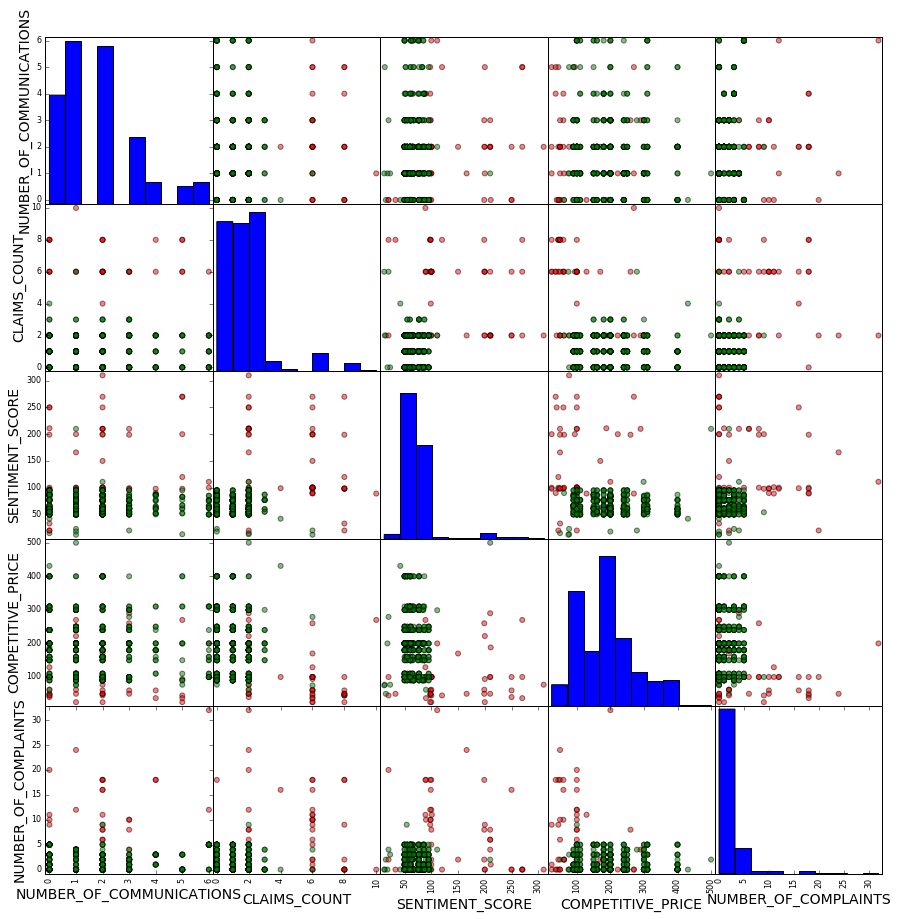

In [29]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[df.cluster], figsize=(15,15), s=100)

Do you notice any cluster assignments that seem a bit odd? How might we explain those?

## Part 2: Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

In [30]:
# calculate SC for K=2
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.57702151275760105

In [31]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

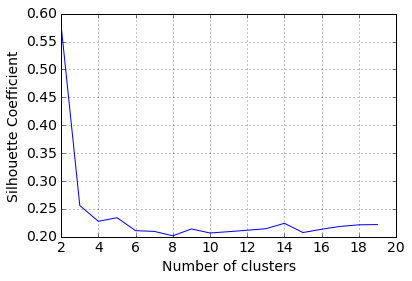

In [32]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [33]:
# K-means with 4 clusters on scaled data
km = KMeans(n_clusters=4, random_state=1)
km.fit(X_scaled)
df['cluster'] = km.labels_
df.sort_values(by = 'cluster')

,INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,EDUCATION_LEVEL,EMPLOYMENT_STATUS,GENDER,MARITAL_STATUS,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,RENEWAL_DATE,PAYMENT_FREQUENCY,CHURN,CURRENT_ROW_INDICATOR,REGION,COUNTRY,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,COUNTRY_NAME,BUNDLE_INDICATOR,REGION_NAME,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,PAYMENT_TYPE,CUSTOMER_TYPE,CANCELLATION_REASON,NUMBER_OF_RISKS,AUTO_MAKE,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP,AUTO_MODEL,AGENT,CHANNEL,cluster
250,10002074,1002616,5,61575,31,0,158,0,High School,Employed,F,Married,67,750,865,4/11/18,YEARLY,0,1,OHIO,US,600,90,US,0,CENTRAL,430,2,3,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Parker,Bank,0
231,10002049,1002591,5,65507,51,1,545,0,High School,Unemployed,M,Single,52,650,550,4/12/18,MONTHLY,0,1,OHIO,US,725,400,US,0,CENTRAL,430,2,0,CASH,SHORT-TERM,DECEASED,4,BMW,2016,1,4SERIES,Mitchell,Agent,0
106,10001890,1002432,6,505,60,2,119,4,PhD,Retired,M,Married,62,750,600,4/9/18,YEARLY,0,1,OHIO,US,770,150,US,0,CENTRAL,430,1,5,CASH,SHORT-TERM,NSF,2,FORD,2011,6,F150,Bell,Bank,0
233,10002051,1002593,4,65507,23,1,750,2,PhD,Selfemployed,F,Married,60,450,720,4/14/18,YEARLY,0,1,OHIO,US,750,310,US,0,CENTRAL,430,2,3,DEBIT,SHORT-TERM,NSF,3,GMC,2015,2,ACADIA,Baker,Bank,0
102,10001886,1002428,3,62874,46,2,498,2,High School,Employed,M,Married,50,550,1000,4/5/18,MONTHLY,0,1,OHIO,US,800,200,US,0,CENTRAL,430,2,0,DEBIT,LONG-TERM,EVENT,2,FORD,2009,8,F150,King,Bank,0
460,10001990,1002532,6,73714,29,0,543,6,Graduate,Retired,U,Married,77,890,1000,4/5/18,MONTHLY,0,1,OHIO,US,800,100,US,0,CENTRAL,430,3,5,CASH,SHORT-TERM,DECEASED,2,BMW,2015,2,4SERIES,Walker,Agent,0
239,10002061,1002603,3,127932,27,2,545,0,Graduate,Retired,M,Single,62,600,900,4/16/18,MONTHLY,0,1,OHIO,US,450,200,US,0,CENTRAL,430,3,0,CREDIT,SHORT-TERM,DECEASED,2,BMW,2016,1,4SERIES,Phillips,Agent,0
94,10001876,1002418,4,64981,27,0,568,2,High School,Unemployed,M,Married,77,450,600,3/22/19,QUARTERLY,0,1,OHIO,US,450,180,US,0,CENTRAL,430,4,3,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,King,Bank,0
93,10001875,1002417,3,63114,23,0,529,3,High School,Retired,M,Married,55,500,885,4/20/18,MONTHLY,0,1,OHIO,US,522,160,US,1,CENTRAL,430,3,1,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Parker,Bank,0
243,10002065,1002607,6,69797,30,0,577,5,PhD,Unemployed,M,Single,75,500,885,4/2/18,YEARLY,0,1,OHIO,US,700,160,US,0,CENTRAL,430,2,5,CASH,SHORT-TERM,DECEASED,2,BMW,2016,1,4SERIES,Reed,Bank,0


## Part 3: DBSCAN clustering

> from [wikipedia](https://en.wikipedia.org/wiki/DBSCAN)

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm proposed by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu in 1996. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

In [34]:
# DBSCAN with eps=1 and min_samples=7
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=7)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=7, n_jobs=1, p=None)

In [35]:
# review the cluster labels
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0

In [36]:
# save the cluster labels and sort by cluster
df['cluster'] = db.labels_
df.sort_values(by='cluster')

,INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,EDUCATION_LEVEL,EMPLOYMENT_STATUS,GENDER,MARITAL_STATUS,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,RENEWAL_DATE,PAYMENT_FREQUENCY,CHURN,CURRENT_ROW_INDICATOR,REGION,COUNTRY,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,COUNTRY_NAME,BUNDLE_INDICATOR,REGION_NAME,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,PAYMENT_TYPE,CUSTOMER_TYPE,CANCELLATION_REASON,NUMBER_OF_RISKS,AUTO_MAKE,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP,AUTO_MODEL,AGENT,CHANNEL,cluster
0,10001831,1002373,2,76152,27,6,287,0,Professional,Selfemployed,M,Married,150,500,525,4/2/18,MONTHLY,1,1,OHIO,US,525,170,US,0,CENTRAL,430,3,2,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Robinson,Bank,-1
75,10001851,1002393,4,71501,29,2,119,2,Graduate,Selfemployed,F,Married,87,500,700,3/23/19,YEARLY,0,1,OHIO,US,750,250,US,0,CENTRAL,430,2,3,CASH,LONG-TERM,EVENT,0,FORD,2009,8,F150,Collins,Bank,-1
73,10001849,1002391,5,119152,46,2,157,5,PhD,Unemployed,U,Married,83,600,525,4/20/18,MONTHLY,0,1,OHIO,US,750,200,US,0,CENTRAL,430,2,0,DEBIT,LONG-TERM,EVENT,2,FORD,2009,8,F150,King,Bank,-1
57,10002155,1002697,1,69001,54,6,202,10,PhD,Employed,U,Married,12,500,525,4/14/18,MONTHLY,1,1,OHIO,US,522,75,US,0,CENTRAL,430,5,0,CREDIT,SHORT-TERM,DECEASED,1,HONDA,2014,3,CIVIC,Watson,Agent,-1
55,10002114,1002656,0,22220,26,6,301,3,High School,Selfemployed,M,Married,100,700,900,4/17/18,MONTHLY,1,1,OHIO,US,750,100,US,0,CENTRAL,430,2,5,DEBIT,LONG-TERM,EVENT,0,GMC,2009,8,ACADIA,Nelson,Bank,-1
54,10002110,1002652,2,65507,29,6,543,8,Graduate,Unemployed,M,Divorce,101,600,525,3/22/19,YEARLY,1,1,OHIO,US,725,100,US,0,CENTRAL,430,2,11,DEBIT,NEW,EVENT,2,FORD,2009,8,F150,Thomas,Bank,-1
52,10002079,1002621,2,45000,31,2,238,1,High School,Unemployed,M,Divorce,111,500,900,3/9/17,YEARLY,1,1,OHIO,US,480,299,US,0,CENTRAL,430,2,4,CASH,NEW,NSF,3,GMC,2011,6,ACADIA,Adams,Bank,-1
51,10002070,1002612,2,71501,37,2,395,4,High School,Unemployed,U,Married,210,750,550,4/7/18,QUARTERLY,1,1,OHIO,US,750,100,US,0,CENTRAL,430,3,8,DEBIT,LONG-TERM,NSF,2,GMC,2012,5,ACADIA,Martin,Bank,-1
106,10001890,1002432,6,505,60,2,119,4,PhD,Retired,M,Married,62,750,600,4/9/18,YEARLY,0,1,OHIO,US,770,150,US,0,CENTRAL,430,1,5,CASH,SHORT-TERM,NSF,2,FORD,2011,6,F150,Bell,Bank,-1
50,10002066,1002608,0,69001,24,6,439,6,PhD,Employed,U,Married,89,550,600,4/3/18,QUARTERLY,1,1,OHIO,US,725,129,US,0,CENTRAL,430,1,11,DEBIT,LONG-TERM,EVENT,0,FORD,2005,12,F150,Jones,Bank,-1


In [37]:
# review the cluster centers
df.groupby('cluster').mean()

,INSURANCE_POLICY_ID,CUSTOMER_ID,NUMBER_OF_COMMUNICATIONS,GROSS_INCOME,AGE_OF_PARTY,CLAIMS_COUNT,CLAIMS_AMOUNT,NUMBER_OF_CLAIMS_DENIED,SENTIMENT_SCORE,GROSS_PREMIUM,PREMIUM_AMOUNT,CHURN,CURRENT_ROW_INDICATOR,COMPETITIVE_PREMIUM_AMOUNT_MIN,COMPETITIVE_PRICE,BUNDLE_INDICATOR,POSTAL_CODE,NUMBER_OF_PRODUCTS,NUMBER_OF_COMPLAINTS,NUMBER_OF_RISKS,AUTO_YEAR,LENGTH_OF_CAR_OWNERSHIP
cluster,,,,,,,,,,,,,,,,,,,,,,
-1,10001979.782051,1002521.782051,2.807692,64109.717949,35.692308,3.500000,320.820513,4.256410,112.794872,544.294872,741.730769,0.692308,1,676.935897,168.089744,0.089744,430,2.487179,5.641026,2.000000,2011.166667,5.833333
0,10001981.691954,1002523.691954,1.604598,69058.963218,33.409195,1.045977,342.793103,2.450575,66.820690,567.160920,782.827586,0.009195,1,674.919540,186.970115,0.177011,430,2.445977,1.342529,1.872979,2011.754023,5.200924
1,10001953.190476,1002495.190476,1.333333,63707.809524,35.809524,0.761905,364.428571,2.523810,60.523810,478.571429,645.238095,0.000000,1,694.476190,400.000000,0.142857,430,2.333333,0.619048,1.666667,2011.904762,5.095238


In [38]:
pd.crosstab(df.CHURN, df.cluster)

cluster,-1,0,1
CHURN,,,
0,24,431,21
1,54,4,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feebbc5ac10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7feebaf763d0>]], dtype=object)

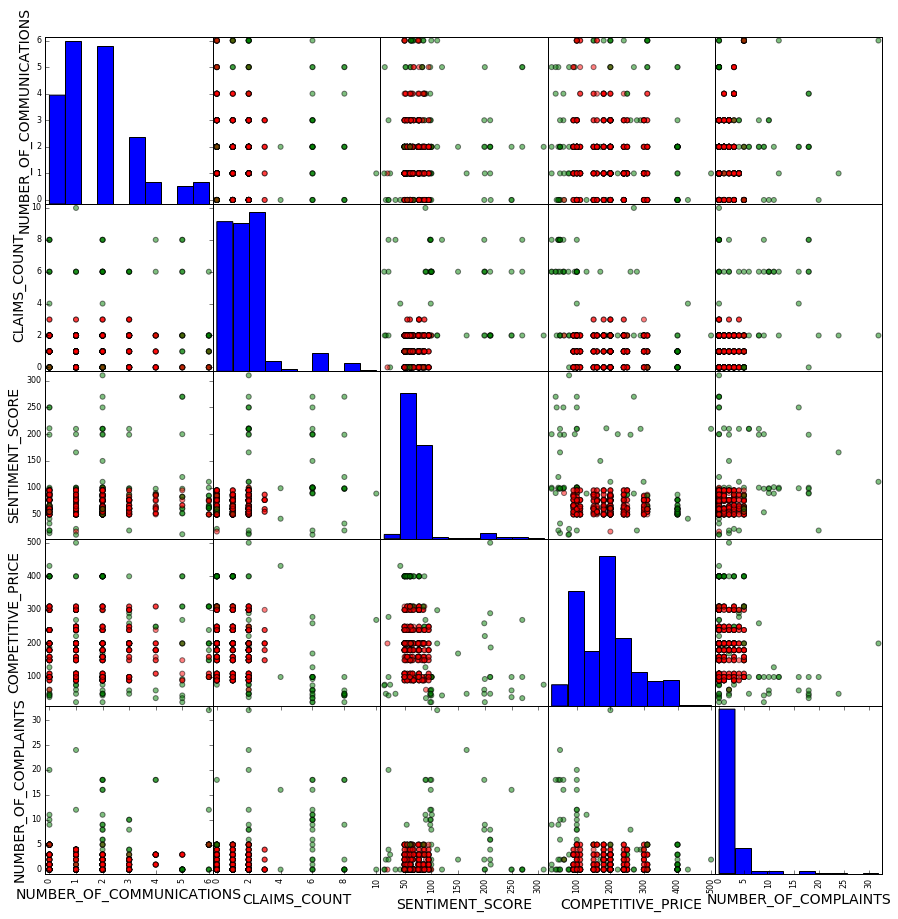

In [39]:
# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.scatter_matrix(X, c=colors[df.cluster], figsize=(15,15), s=100)

## SUMMARY
This illustrative python notebook shows how to get started with basic unsupervised machine learning utilizing Kmeans and DBSCAN techniques.  I hope you to see how easy to adopt IBM's Data Science Experience for your data analytics and modeling needs.  Please find overview and getting-started information in the Data Science Experience documentation: https://datascience.ibm.com/docs/content/getting-started/welcome-main.html. 
Learn about Jupyter notebooks, which are used throughout this scenario, in the Data Science Experience documentation: https://datascience.ibm.com/docs/content/analyze-data/notebooks-parent.html